# Accesing argo data by float

## Data files organized by float

<img src="https://github.com/euroargodev/argoonlineschool/raw/master/images/dac.png" alt="xarray logo" width="650"/>

When accessing the **da**c folder in any of the *FTP* or *HTTP* sites of any of the two GDACs you will find several (11) folders, one for each of the DACs.  Within each one of these folder there is one folder for each one of the floats processed by this particular *DAC*. 

In the example here, we will use data from float with **WMO** number 6901254, that is proceesed by coriolis (later we will see how to find the DAC for each float), therefore within the folder `./6901254`, we find the following files and folder:

- 6901254_Rtraj.nc 
- 6901254_meta.nc  
- 6901254_prof.nc  
- 6901254_tech.nc  
- ./profiles

we will describe the content of each of these files later, but let's focus on the folder `./profiles/` since it contains one file for each one of the hydrographic cycles carried out by the float. **R6901254_001.nc** is the file that contains the data from the first cycle. It begins with a *R* since it is the real time data, if it began with an *D* it would be adjusted data, or Delayed Mode data; we will see and example in section [**ACTUALIZAR**]. 

Additionally some argo floats, as 6901254, also made obserations in the first descent from the surface to the parking depth, in this case the name of the files with this data would be **R6901254_001D.nc**.  

In general, the format of the file names for individual profiles are `<R/D><FloatWmoID>_<XXX><D>.nc` where :

- The initial *R* indicates Real-Time data, the initial *D* indicates Delayed-Mode data
- *XXX* is the cycle number
- The second *D* indicates a descending profile, if exist, while profiles without this D are collected during ascent.


Note that it may happens that, in the future, you try to downdload the fles from float 6901254 and there is not `R6901254_001.nc` and `R6901254_001D.nc` files, but you find `D6901254_001.nc` and `D6901254_001D.nc` since the R-files are substituded by the D-files once the data is adjusted, we will describe that in detail in section [**ACTUALIZAR**]

>The data from the float is pre-downloaded in the *./Data* folder, but you can dowload it from the Coriolis GDAC. See the [Data](https://euroargodev.github.io/argoonlineschool/README.html#data) section for instructions on how to download the data.



## Reading an Argo CTD cycle data - the building blocks of Argo

### The first cycle

<img src="https://github.com/euroargodev/argoonlineschool/raw/master/images/ArgoCycle.png" alt="ArgoCycle" width="1200"/>

An **Argo cycle** starts with a descent toward deep water, usually from the surface, and ends after the next programmed ascent to the surface (see the figure). During the surface interval, data transmission typically occurs but it is not a requirement for a cycle to have occurred, but if ocurrs, the cycle ends after the full surface interval has been completed.

Measurements (e.g. pressure, temperature, salinity) are performed during ascent, occasionally during descent, and  subsurface measurements during parking are sometime performed.

Each cycle of a float has a unique number, increased by one after each ascent to the surfce or shallow water. Float cycle numbers usually start at 1. The next cycles are increasing numbers (e.g. 2, 3,...N). Some floats report a cycle 0, called *launch cycle*, that is shorther than the regular cycles. The cycle time is therefore regular only for later profiles and may be variable if the float is reprogrammed after its deployment.

For those floats with cycle 0, if there is an initial descend profile, it would be on cycle 0.

First, import libraries

In [1]:
import numpy as np
import xarray as xr
import netCDF4
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
cy1  = xr.open_dataset('./Data/6901254/profiles/R6901254_001.nc')

Printing the object gives you summary information

In [4]:
cy1

<xarray.Dataset>
Dimensions:                       (N_CALIB: 1, N_HISTORY: 3, N_LEVELS: 97, N_PARAM: 3, N_PROF: 2)
Dimensions without coordinates: N_CALIB, N_HISTORY, N_LEVELS, N_PARAM, N_PROF
Data variables:
    DATA_TYPE                     object ...
    FORMAT_VERSION                object ...
    HANDBOOK_VERSION              object ...
    REFERENCE_DATE_TIME           object ...
    DATE_CREATION                 object ...
    DATE_UPDATE                   object ...
    PLATFORM_NUMBER               (N_PROF) object ...
    PROJECT_NAME                  (N_PROF) object ...
    PI_NAME                       (N_PROF) object ...
    STATION_PARAMETERS            (N_PROF, N_PARAM) object ...
    CYCLE_NUMBER                  (N_PROF) float64 ...
    DIRECTION                     (N_PROF) object ...
    DATA_CENTRE                   (N_PROF) object ...
    DC_REFERENCE                  (N_PROF) object ...
    DATA_STATE_INDICATOR          (N_PROF) object ...
    DATA_MODE                     (N_PROF) object ...
    PLATFORM_TYPE                 (N_PROF) object ...
    FLOAT_SERIAL_NO               (N_PROF) object ...
    FIRMWARE_VERSION              (N_PROF) object ...
    WMO_INST_TYPE                 (N_PROF) object ...
    JULD                          (N_PROF) datetime64[ns] ...
    JULD_QC                       (N_PROF) object ...
    JULD_LOCATION                 (N_PROF) datetime64[ns] ...
    LATITUDE                      (N_PROF) float64 ...
    LONGITUDE                     (N_PROF) float64 ...
    POSITION_QC                   (N_PROF) object ...
    POSITIONING_SYSTEM            (N_PROF) object ...
    PROFILE_PRES_QC               (N_PROF) object ...
    PROFILE_TEMP_QC               (N_PROF) object ...
    PROFILE_PSAL_QC               (N_PROF) object ...
    VERTICAL_SAMPLING_SCHEME      (N_PROF) object ...
    CONFIG_MISSION_NUMBER         (N_PROF) float64 ...
    PRES                          (N_PROF, N_LEVELS) float32 ...
    PRES_QC                       (N_PROF, N_LEVELS) object ...
    PRES_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    PRES_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    PRES_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    TEMP                          (N_PROF, N_LEVELS) float32 ...
    TEMP_QC                       (N_PROF, N_LEVELS) object ...
    TEMP_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    TEMP_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    TEMP_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    PSAL                          (N_PROF, N_LEVELS) float32 ...
    PSAL_QC                       (N_PROF, N_LEVELS) object ...
    PSAL_ADJUSTED                 (N_PROF, N_LEVELS) float32 ...
    PSAL_ADJUSTED_QC              (N_PROF, N_LEVELS) object ...
    PSAL_ADJUSTED_ERROR           (N_PROF, N_LEVELS) float32 ...
    HISTORY_INSTITUTION           (N_HISTORY, N_PROF) object ...
    HISTORY_STEP                  (N_HISTORY, N_PROF) object ...
    HISTORY_SOFTWARE              (N_HISTORY, N_PROF) object ...
    HISTORY_SOFTWARE_RELEASE      (N_HISTORY, N_PROF) object ...
    HISTORY_REFERENCE             (N_HISTORY, N_PROF) object ...
    HISTORY_DATE                  (N_HISTORY, N_PROF) object ...
    HISTORY_ACTION                (N_HISTORY, N_PROF) object ...
    HISTORY_PARAMETER             (N_HISTORY, N_PROF) object ...
    HISTORY_START_PRES            (N_HISTORY, N_PROF) float32 ...
    HISTORY_STOP_PRES             (N_HISTORY, N_PROF) float32 ...
    HISTORY_PREVIOUS_VALUE        (N_HISTORY, N_PROF) float32 ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object ...
    PARAMETER                     (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_EQUATION     (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_COEFFICIENT  (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_COMMENT      (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_DATE         (N_PROF, N_CAL

We see how useful is the **Self-Describing** propierty of the netCDF format. Let's focus in the core variables, TEMP, SALT and PRES. Although we could inspect the previous print-out of the *cy1* dataset, we can use the data itself:

In [5]:
print(f"The core variables are: \n TEMP {cy1.TEMP.long_name} \n PSAL {cy1.PSAL.long_name} and \n PRES{cy1.PRES.long_name}")

The core variables are: 
 TEMP Sea temperature in-situ ITS-90 scale 
 PSAL Practical salinity and 
 PRESSea water pressure, equals 0 at sea-level


In [6]:
print(f"The dimesions of TEMP are:\n {cy1.TEMP.dims[0]}:{cy1.TEMP.shape[0]} \n {cy1.TEMP.dims[1]}:{cy1.TEMP.shape[1]}")

The dimesions of TEMP are:
 N_PROF:2 
 N_LEVELS:97


We note that for for the first cycle there are two profiles (N_PROF=2) and 95 vertical levels... lets plot them:

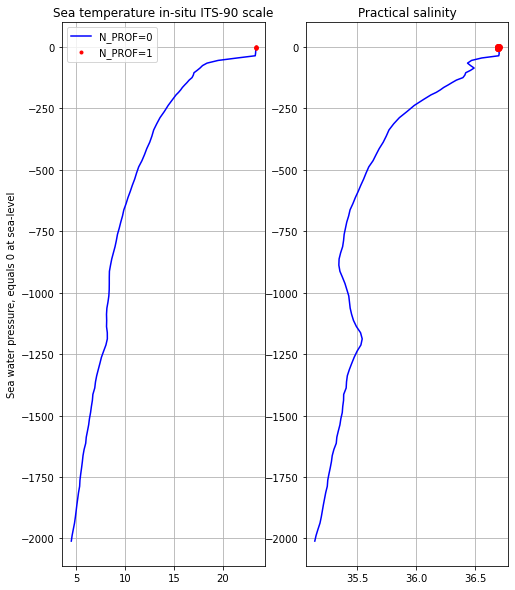

In [7]:
fig, ax = plt.subplots(1,2,figsize=(8,10))

#Temperature
ax[0].plot(cy1.TEMP[0],-cy1.PRES[0],'b-',label='N_PROF=0')
ax[0].plot(cy1.TEMP[1],-cy1.PRES[1],'r.',label='N_PROF=1')
ax[0].set_title(cy1.TEMP.long_name)
ax[0].set_ylabel(cy1.PRES.long_name)
ax[0].grid()
ax[0].legend()

#Salinity
ax[1].plot(cy1.PSAL[0],-cy1.PRES[0],'b-',label='N_PROF=0')
ax[1].plot(cy1.PSAL[1],-cy1.PRES[1],'ro',label='N_PROF=1')
ax[1].set_title(cy1.PSAL.long_name)
ax[1].grid()

This is, within the cycle file, there area two profiles. The first one (N_PROF=0 in blue) it is measured during its ascend from 2000 dbar to 5 dbar and it constitutes the core argo program; the second one (N_PROF=1 in red) only measures the top 5 dbar. 

Once again all the information is in the netcf file, the data variable *VERTICAL_SAMPLING_SCHEME* contains all the details:

In [8]:
print(f"The first profile is the: { str(cy1.VERTICAL_SAMPLING_SCHEME[0].astype(str).values) }")

The first profile is the: Primary sampling: averaged [10 sec sampling, 25 dbar average from 2000 dbar to 200 dbar; 10 sec sampling, 10 dbar average from 200 dbar to 10 dbar; 10 sec sampling, 1 dbar average from 10 dbar to 5.5 dbar]                                                   


In [9]:
print(f"The second profile is the: {cy1.VERTICAL_SAMPLING_SCHEME[1].astype(str).values}")

The second profile is the: Near-surface sampling: averaged, unpumped [10 sec sampling, 1 dbar average from 5.5 dbar to surface]                                                                                                                                                            


Ago floats may measure several profiles in each cycle, however as a rule of thumb the first profile is always the **core mission argo CTD profile** (2000 dbar - 5 dbar). In the case of this float there is an additional second profile, with higher resolution (10 sec sampling and 1 dbar average) but unpumped, this is the sensor of conductity (for salinity) is not pumping water through to avoid contamination or biodeposition from the surface. The data from this second profile is used, mostly, for calibrations of SST observations from satellite.

In the *Reference table 16: vertical sampling schemes* of the *Argo Data Management Team. Argo user’s manual. https://doi.org/10.13155/29825* there is a description of all the different options in VERTICAL_SAMPLING_SCHEME. However a discusion of all of them is beyond the objective of this AoS than focus on understanding the basic concepts.

---
As mentioned before, some floats also make measurmentes in the first descending phase of the first cycle, the data is in the <R/D><FloatWmoID>_001D.nc file

In [10]:
cy1D = xr.open_dataset('./Data/6901254/profiles/R6901254_001D.nc')

In [11]:
print(f"The dimesions of TEMP are:\n {cy1D.TEMP.dims[0]}:{cy1D.TEMP.shape[0]} \n {cy1D.TEMP.dims[1]}:{cy1D.TEMP.shape[1]}")

The dimesions of TEMP are:
 N_PROF:1 
 N_LEVELS:51


in this case there is only one profile, let's plot it together with the ascending data (cy1):


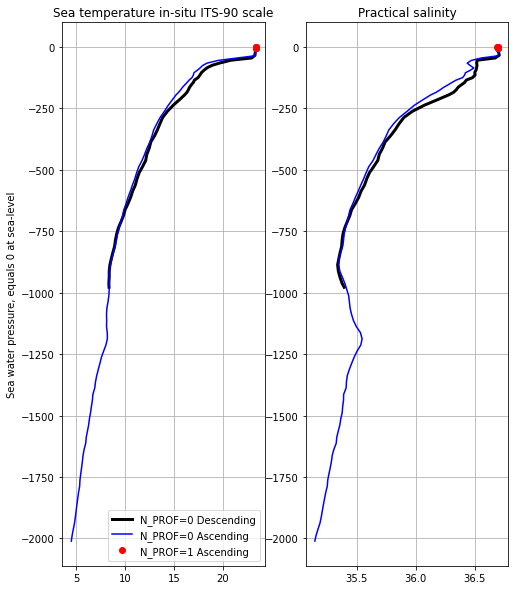

In [12]:
fig, ax = plt.subplots(1,2,figsize=(8,10))

#Temperature
ax[0].plot(cy1D.TEMP[0],-cy1D.PRES[0],'k-',label='N_PROF=0 Descending',linewidth=3.0)
ax[0].plot(cy1.TEMP[0],-cy1.PRES[0],'b-',label='N_PROF=0 Ascending')
ax[0].plot(cy1.TEMP[1],-cy1.PRES[1],'ro',label='N_PROF=1 Ascending')
ax[0].set_title(cy1.TEMP.long_name)
ax[0].set_ylabel(cy1.PRES.long_name)
ax[0].grid()
ax[0].legend()

#Salinity
ax[1].plot(cy1D.PSAL[0],-cy1D.PRES[0],'k-',label='N_PROF=0 Descending',linewidth=3.0)
ax[1].plot(cy1.PSAL[0],-cy1.PRES[0],'b-',label='N_PROF=0 Ascending')
ax[1].plot(cy1.PSAL[1],-cy1.PRES[1],'ro',label='N_PROF=1 Ascending')
ax[1].set_title(cy1.PSAL.long_name)
ax[1].grid()

As indicated in the figura, the first descending is only until the parking depth.

The netcdf file include the information about the geographical postion of the observations (LONGITUDE and LATITUDE) and the date of the observation (JULD)

In [13]:
for variable in ['LONGITUDE', 'LATITUDE' , 'JULD']:
   print(f"The {cy1.data_vars[variable].long_name} is in the variable {variable}")

The Longitude of the station, best estimate is in the variable LONGITUDE
The Latitude of the station, best estimate is in the variable LATITUDE
The Julian day (UTC) of the station relative to REFERENCE_DATE_TIME is in the variable JULD


Let's plot it

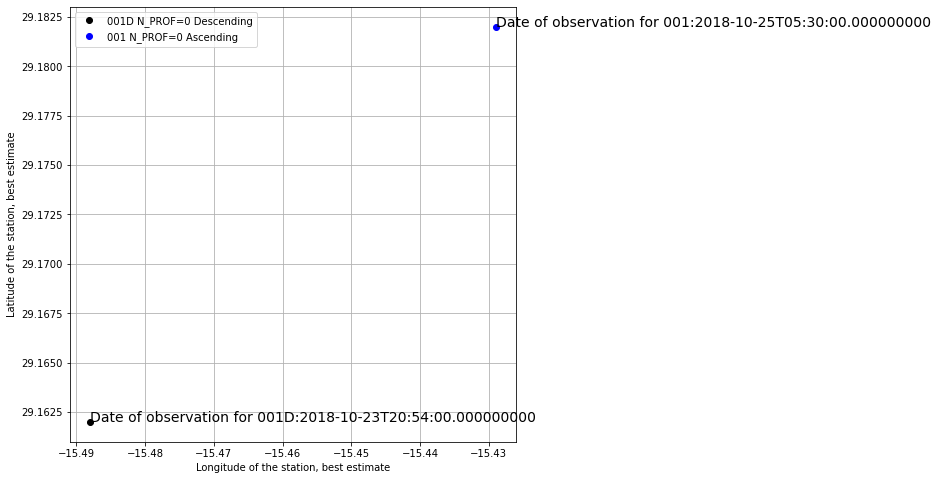

In [14]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(cy1D.LONGITUDE[0],cy1D.LATITUDE[0],'ko',label='001D N_PROF=0 Descending')
ax.plot(cy1.LONGITUDE[0],cy1.LATITUDE[0],'bo',label='001 N_PROF=0 Ascending')
#ax.set_title(cy1..long_name)
ax.set_xlabel(cy1.LONGITUDE.long_name)
ax.set_ylabel(cy1.LATITUDE.long_name)
ax.text(cy1D.LONGITUDE[0],cy1D.LATITUDE[0],'Date of observation for 001D:'+cy1D.JULD[0].values.astype(str), fontsize=14)
ax.text(cy1.LONGITUDE[0],cy1.LATITUDE[0],'Date of observation for 001:'+cy1.JULD[0].values.astype(str), fontsize=14)
ax.grid()
ax.legend();

The 2 ascending profiles in 001 have, obviously, the same time stamp:

In [15]:
print(cy1.JULD[0].values.astype(str))
print(cy1.JULD[1].values.astype(str))

2018-10-25T05:30:00.000000000
2018-10-25T05:30:00.000000000


Note that for some floats there is a <R/D><FloatWmoID>_000.n or even a <R/D><FloatWmoID>_000D.n file.

The netcdf file for each cycle includes a lot of additional information about each one of the profiles in it. Let's take a look of the basic information. 

In [17]:
print(f"For cycle {cy1D.CYCLE_NUMBER.astype(int).values} The {cy1D.DIRECTION.long_name} (DIRECTION) is {cy1D.DIRECTION.values.astype(str)}")
print(f"For cycle  {cy1.CYCLE_NUMBER.astype(int).values} the {cy1.DIRECTION.long_name}  (DIRECTION) is {cy1.DIRECTION.values.astype(str)}")

For cycle [1] The Direction of the station profiles (DIRECTION) is ['D']
For cycle  [1 1] the Direction of the station profiles  (DIRECTION) is ['A' 'A']


A is for ascending and D for descending.

And all the meta information of the float, and for each profile within each cycle, among others:

In [18]:
for variable in ['PLATFORM_NUMBER','DATA_CENTRE','PROJECT_NAME','PI_NAME']:
   print(f"The {cy1.data_vars[variable].long_name} ({variable}) is {cy1.data_vars[variable].values.astype(str)}")

The Float unique identifier (PLATFORM_NUMBER) is ['6901254 ' '6901254 ']
The Data centre in charge of float data processing (DATA_CENTRE) is ['IF' 'IF']
The Name of the project (PROJECT_NAME) is ['ARGO SPAIN                                                      '
 'ARGO SPAIN                                                      ']
The Name of the principal investigator (PI_NAME) is ['Pedro Velez                                                     '
 'Pedro Velez                                                     ']


We can also access the dimession that define the profile

In [19]:
for key in cy1.dims.keys():
    print(key,cy1.dims[key])

N_CALIB 1
N_HISTORY 3
N_LEVELS 97
N_PARAM 3
N_PROF 2


N_LEVELS is the number of vertical leves, i.e. in pressure. N_PROF the number of profiles within the cycle, as we saw previously and N_PARAM is te number of paramters, 3 for this float: TEMP, PSAL and PRES

Later we will explain N_CALIB and N_HISTORY

Convenetly, all the core mision profiles are compated in a single file `<FloatWmoID>_prof.nc` 

## File <FloatWmoID>_prof.nc

In [2]:
prof  = xr.open_dataset('./Data/6901254/6901254_prof.nc')

In this case, N_PROF is 66, since there are 66 two for the first cycle, the descending and the ascending. This profiles are just the 'Primary sampling', if you need the high resotuion upper 5dbar you ave to use the indvidual cycle files.

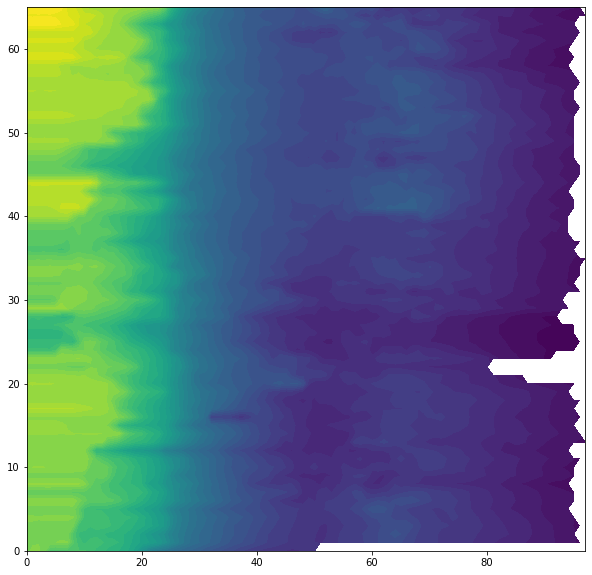

In [3]:
fig , ax = plt.subplots(figsize=(10,10))
ax.contourf(prof.PSAL,40)

However, if we want to add the proper pressure levels, since each profile have slighly different levels

In [4]:
prof.PRES[3,:].values

array([   6.,    7.,    8.,    9.,   10.,   16.,   25.,   36.,   46.,
         55.,   66.,   76.,   86.,   96.,  106.,  115.,  125.,  135.,
        146.,  156.,  165.,  176.,  186.,  196.,  213.,  237.,  262.,
        288.,  313.,  338.,  363.,  388.,  413.,  438.,  463.,  488.,
        513.,  538.,  563.,  588.,  613.,  638.,  663.,  687.,  713.,
        738.,  763.,  788.,  813.,  838.,  863.,  888.,  914.,  938.,
        963.,  988., 1013., 1038., 1063., 1088., 1113., 1139., 1163.,
       1188., 1213., 1238., 1263., 1288., 1313., 1338., 1363., 1388.,
       1413., 1439., 1463., 1488., 1513., 1538., 1563., 1588., 1613.,
       1638., 1663., 1688., 1713., 1738., 1763., 1788., 1813., 1838.,
       1863., 1888., 1913., 1938., 1963., 1988., 2013., 2036.],
      dtype=float32)

In [5]:
prof.PRES[4,:].values

array([   6.,    7.,    8.,    9.,   10.,   16.,   25.,   35.,   45.,
         55.,   66.,   75.,   85.,   95.,  106.,  116.,  125.,  135.,
        145.,  156.,  165.,  175.,  186.,  196.,  213.,  238.,  263.,
        287.,  313.,  338.,  363.,  388.,  413.,  438.,  463.,  488.,
        513.,  538.,  563.,  588.,  613.,  638.,  663.,  689.,  713.,
        738.,  763.,  788.,  813.,  838.,  863.,  889.,  913.,  938.,
        963.,  988., 1013., 1038., 1063., 1089., 1113., 1138., 1163.,
       1188., 1213., 1238., 1263., 1289., 1313., 1338., 1363., 1388.,
       1413., 1438., 1462., 1488., 1513., 1538., 1563., 1588., 1613.,
       1639., 1663., 1688., 1713., 1737., 1763., 1788., 1813., 1837.,
       1863., 1888., 1913., 1938., 1963., 1978.,   nan,   nan],
      dtype=float32)

we will need to do a little of interpolation to use contour:

In [6]:
juld=prof.JULD.values
psal=prof.PSAL.values
pres=prof.PRES.values
prei=np.arange(5,2005,5)

psali= np.zeros((juld.shape[0],prei.shape[0]))
psali.fill(np.nan)

for ip in range(0,66):
    psali[ip,:]=np.interp(prei,pres[ip,:],psal[ip,:])

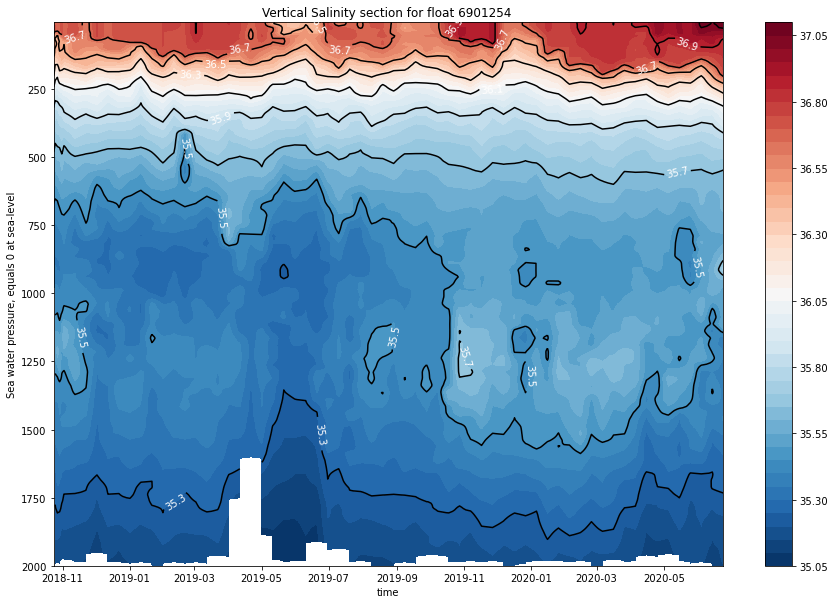

In [10]:
fig, ax = plt.subplots(figsize=(15,10))

cs=ax.contourf(juld,prei,psali.transpose(),40,cmap="RdBu_r")
cs2=ax.contour(juld,prei,psali.transpose(),colors=('k'), levels=cs.levels[::4])

ax.invert_yaxis()
ax.clabel(cs2, fmt='%2.1f', colors='w', fontsize=10)

ax.set_title(f"Vertical Salinity section for float {prof.PLATFORM_NUMBER[0].astype(str).values}")
ax.set_xlabel(f"{prof.JULD.standard_name}")
ax.set_ylabel(f"{prof.PRES.long_name}")

cbar=fig.colorbar(cs,ax=ax)

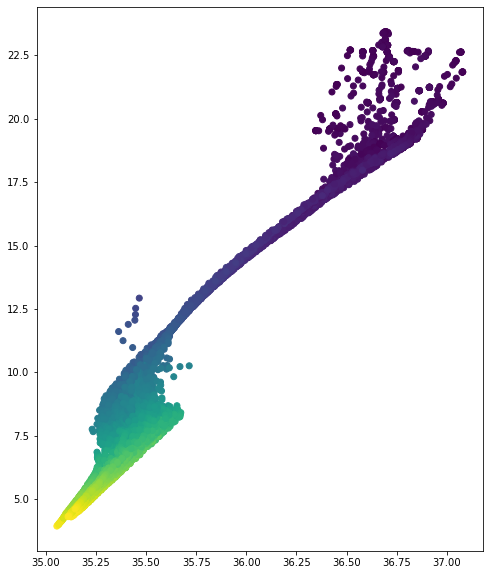

In [194]:
fig, ax = plt.subplots(figsize=(8,10))
ax.scatter(prof.PSAL,prof.TEMP,c=prof.PRES)

## Meta data
there is a lof of additional meta information in the `<FloatWmoID>_meta.nc` file

In [15]:
Mdata = xr.open_dataset('./Data/6901254/6901254_meta.nc')

Always we have the basic information than appers in all the netcdf files of an Argo float:

In [17]:
for variable in ['PLATFORM_NUMBER','DATA_CENTRE','PROJECT_NAME','PI_NAME']:
   print(f"The {Mdata.data_vars[variable].long_name} ({variable}) is {Mdata.data_vars[variable].values.astype(str)}")

The Float unique identifier (PLATFORM_NUMBER) is 6901254 
The Data centre in charge of float real-time processing (DATA_CENTRE) is IF
The Program under which the float was deployed (PROJECT_NAME) is ARGO SPAIN                                                      
The Name of the principal investigator (PI_NAME) is Pedro Velez                                                     


and some examples of addtional information

In [20]:
for variable in ['FIRMWARE_VERSION','BATTERY_TYPE','DEPLOYMENT_PLATFORM','CONFIG_PARAMETER_NAME','SENSOR_SERIAL_NO']:
   print(f"The {Mdata.data_vars[variable].long_name} ({variable}) is {Mdata.data_vars[variable].values.astype(str)}")

The Firmware version for the float (FIRMWARE_VERSION) is n/a                             
The Type of battery packs in the float (BATTERY_TYPE) is LITHIUM                                                         
The Identifier of the deployment platform (DEPLOYMENT_PLATFORM) is ANGELES ALVARI?O                
The Name of configuration parameter (CONFIG_PARAMETER_NAME) is ['CONFIG_CycleTime_hours                                                                                                          '
 'CONFIG_ParkPressure_dbar                                                                                                        '
 'CONFIG_ProfilePressure_dbar                                                                                                     '
 'CONFIG_DescentToParkPresSamplingTime_seconds                                                                                    '
 'CONFIG_Direction_NUMBER                                                                        

## Trayectory data

In [21]:
Rtraj = xr.open_dataset('./Data/6901254/6901254_Rtraj.nc')

In [22]:
Rtraj

<xarray.Dataset>
Dimensions:                              (N_CYCLE: 66, N_HISTORY: 1043, N_MEASUREMENT: 4289, N_PARAM: 3)
Dimensions without coordinates: N_CYCLE, N_HISTORY, N_MEASUREMENT, N_PARAM
Data variables:
    DATA_TYPE                            object ...
    FORMAT_VERSION                       object ...
    HANDBOOK_VERSION                     object ...
    REFERENCE_DATE_TIME                  object ...
    DATE_CREATION                        object ...
    DATE_UPDATE                          object ...
    PLATFORM_NUMBER                      object ...
    PROJECT_NAME                         object ...
    PI_NAME                              object ...
    TRAJECTORY_PARAMETERS                (N_PARAM) object ...
    DATA_CENTRE                          object ...
    DATA_STATE_INDICATOR                 object ...
    PLATFORM_TYPE                        object ...
    FLOAT_SERIAL_NO                      object ...
    FIRMWARE_VERSION                     object ...
    WMO_INST_TYPE                        object ...
    POSITIONING_SYSTEM                   object ...
    JULD                                 (N_MEASUREMENT) datetime64[ns] ...
    JULD_STATUS                          (N_MEASUREMENT) object ...
    JULD_QC                              (N_MEASUREMENT) object ...
    JULD_ADJUSTED                        (N_MEASUREMENT) datetime64[ns] ...
    JULD_ADJUSTED_STATUS                 (N_MEASUREMENT) object ...
    JULD_ADJUSTED_QC                     (N_MEASUREMENT) object ...
    LATITUDE                             (N_MEASUREMENT) float64 ...
    LONGITUDE                            (N_MEASUREMENT) float64 ...
    POSITION_ACCURACY                    (N_MEASUREMENT) object ...
    POSITION_QC                          (N_MEASUREMENT) object ...
    CYCLE_NUMBER                         (N_MEASUREMENT) float64 ...
    CYCLE_NUMBER_ADJUSTED                (N_MEASUREMENT) float64 ...
    MEASUREMENT_CODE                     (N_MEASUREMENT) float64 ...
    AXES_ERROR_ELLIPSE_MAJOR             (N_MEASUREMENT) float32 ...
    AXES_ERROR_ELLIPSE_MINOR             (N_MEASUREMENT) float32 ...
    AXES_ERROR_ELLIPSE_ANGLE             (N_MEASUREMENT) float32 ...
    SATELLITE_NAME                       (N_MEASUREMENT) object ...
    PRES                                 (N_MEASUREMENT) float32 ...
    PRES_QC                              (N_MEASUREMENT) object ...
    PRES_ADJUSTED                        (N_MEASUREMENT) float32 ...
    PRES_ADJUSTED_QC                     (N_MEASUREMENT) object ...
    PRES_ADJUSTED_ERROR                  (N_MEASUREMENT) float32 ...
    TEMP                                 (N_MEASUREMENT) float32 ...
    TEMP_QC                              (N_MEASUREMENT) object ...
    TEMP_ADJUSTED                        (N_MEASUREMENT) float32 ...
    TEMP_ADJUSTED_QC                     (N_MEASUREMENT) object ...
    TEMP_ADJUSTED_ERROR                  (N_MEASUREMENT) float32 ...
    PSAL                                 (N_MEASUREMENT) float32 ...
    PSAL_QC                              (N_MEASUREMENT) object ...
    PSAL_ADJUSTED                        (N_MEASUREMENT) float32 ...
    PSAL_ADJUSTED_QC                     (N_MEASUREMENT) object ...
    PSAL_ADJUSTED_ERROR                  (N_MEASUREMENT) float32 ...
    JULD_DESCENT_START                   (N_CYCLE) datetime64[ns] ...
    JULD_DESCENT_START_STATUS            (N_CYCLE) object ...
    JULD_FIRST_STABILIZATION             (N_CYCLE) datetime64[ns] ...
    JULD_FIRST_STABILIZATION_STATUS      (N_CYCLE) object ...
    JULD_DESCENT_END                     (N_CYCLE) datetime64[ns] ...
    JULD_DESCENT_END_STATUS              (N_CYCLE) object ...
    JULD_PARK_START                      (N_CYCLE) datetime64[ns] ...
    JULD_PARK_START_STATUS               (N_CYCLE) object ...
    JULD_PARK_END                        (N_CYCLE) datetime64[ns] ...
    JULD_PARK_END_STATUS                 (N_CYCLE) object ...
    JULD_DEEP_DESCENT_EN

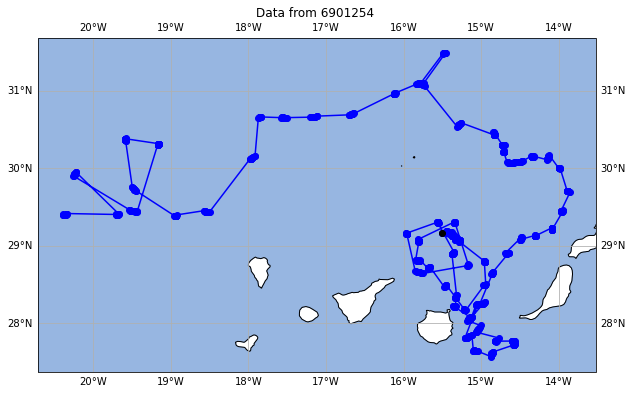

In [23]:
import cartopy.crs as ccrs
import cartopy
import numpy as np


fig,ax = plt.subplots(figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax.plot(Rtraj.LONGITUDE,Rtraj.LATITUDE,'ob')
ax.plot(Rtraj.LONGITUDE[~np.isnan(Rtraj.LONGITUDE)],Rtraj.LATITUDE[~np.isnan(Rtraj.LATITUDE)],'-b')
ax.plot(Rtraj.LONGITUDE[0],Rtraj.LATITUDE[0],'ok')
ax.plot(Rtraj.LONGITUDE[-1],Rtraj.LATITUDE[-1],'sk')

ax.set_title(f"Data from {Rtraj.PLATFORM_NUMBER.values.astype(str)}")
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN)
ax.gridlines(draw_labels=True, x_inline=False, y_inline=False);

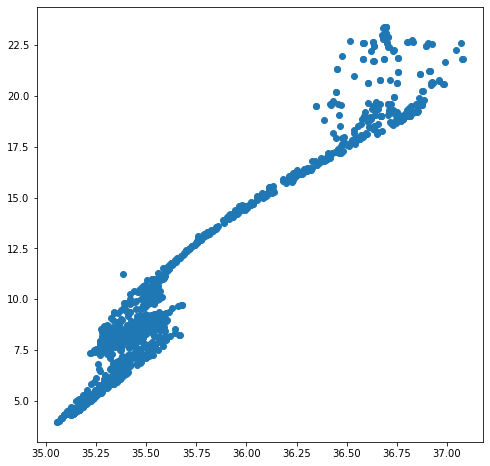

In [24]:
fig,ax = plt.subplots(figsize=(8,8))
ax.plot(Rtraj.PSAL,Rtraj.TEMP,'o')

In [25]:
Rtraj.PRES

<xarray.DataArray 'PRES' (N_MEASUREMENT: 4289)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Dimensions without coordinates: N_MEASUREMENT
Attributes:
    long_name:              Sea water pressure, equals 0 at sea-level
    standard_name:          sea_water_pressure
    units:                  decibar
    valid_min:              0.0
    valid_max:              12000.0
    C_format:               %7.1f
    FORTRAN_format:         F7.1
    resolution:             1.0
    comment_on_resolution:  PRES resolution is 1 dbar, except for measurement...
    axis:                   Z

## Using argopy

In [26]:
from argopy import DataFetcher as ArgoDataFetcher
plt.style.use('default')

argo_loader = ArgoDataFetcher()
argo_loader = ArgoDataFetcher(backend='erddap')
argo_loader = ArgoDataFetcher(cachedir='tmp')

In [27]:
apDS=argo_loader.float(6901254).to_xarray()

In [28]:
apDS2=argo_loader.profile(6901254,1).to_xarray()

In [29]:
data=apDS2.argo.point2profile()
data

<xarray.Dataset>
Dimensions:          (N_LEVELS: 97, N_PROF: 2)
Coordinates:
    LATITUDE         (N_PROF) float64 29.16 29.18
  * N_PROF           (N_PROF) int64 0 1
    TIME             (N_PROF) datetime64[ns] 2018-10-23T20:54:00 2018-10-25T05:30:00
    LONGITUDE        (N_PROF) float64 -15.49 -15.43
  * N_LEVELS         (N_LEVELS) int64 0 1 2 3 4 5 6 7 ... 90 91 92 93 94 95 96
Data variables:
    CYCLE_NUMBER     (N_PROF) int64 1 1
    DATA_MODE        (N_PROF) <U1 'R' 'R'
    DIRECTION        (N_PROF) <U1 'D' 'A'
    PLATFORM_NUMBER  (N_PROF) int64 6901254 6901254
    POSITION_QC      (N_PROF) int64 1 1
    PRES             (N_PROF, N_LEVELS) float64 14.0 24.0 ... 2.011e+03
    PRES_QC          (N_PROF) int64 1 1
    PSAL             (N_PROF, N_LEVELS) float64 36.69 36.71 ... 35.15 35.14
    PSAL_QC          (N_PROF) int64 1 1
    TEMP             (N_PROF, N_LEVELS) float64 23.4 23.35 23.33 ... 4.559 4.474
    TEMP_QC          (N_PROF) int64 1 1
    TIME_QC          (N_PROF) int64 1 1
Attributes:
    cdm_altitude_proxy:        pres
    cdm_data_type:             TrajectoryProfile
    cdm_profile_variables:     cycle_number, data_type, format_version, handb...
    cdm_trajectory_variables:  platform_number, project_name, pi_name, platfo...
    Conventions:               Argo-3.1, CF-1.6, COARDS, ACDD-1.3
    creator_email:             support@argo.net
    creator_name:              Argo
    creator_url:               http://www.argo.net/
    Easternmost_Easting:       -15.428999999999974
    featureType:               TrajectoryProfile
    geospatial_lat_max:        29.182
    geospatial_lat_min:        29.162
    geospatial_lat_units:      degrees_north
    geospatial_lon_max:        -15.428999999999974
    geospatial_lon_min:        -15.488
    geospatial_lon_units:      degrees_east
    history:                   2020-07-24T11:55:02Z (local files)\n2020-07-24...
    id:                        ArgoFloats
    infoUrl:                   http://www.argo.net/
    institution:               Argo
    keywords:                  adjusted, argo, array, assembly, best, centre,...
    keywords_vocabulary:       GCMD Science Keywords
    license:                   The data may be used and redistributed for fre...
    Northernmost_Northing:     29.182
    references:                http://www.argodatamgt.org/Documentation
    source:                    Argo float
    sourceUrl:                 (local files)
    Southernmost_Northing:     29.162
    standard_name_vocabulary:  CF Standard Name Table v29
    summary:                   Argo float vertical profiles from Coriolis Glo...
    time_coverage_end:         2018-10-25T05:30:00Z
    time_coverage_start:       2018-10-23T20:54:00Z
    title:                     Argo Float Measurements
    user_manual_version:       3.1
    Westernmost_Easting:       -15.488
    DATA_ID:                   ARGO
    DOI:                       http://doi.org/10.17882/42182
    Fetched_from:              http://www.ifremer.fr/erddap
    Fetched_by:                pvb
    Fetched_date:              2020/07/24
    Fetched_constraints:       phy_WMO6901254_CYC0001
    Fetched_uri:               http://www.ifremer.fr/erddap/tabledap/ArgoFloa...

The core-Argo profile files contain the core parameters provided by a float: pressure, temperature, salinity, conductivity (PRES, TEMP, PSAL, CNDC). All additional parameters are managed in B-Argo data files (see §0).   

NameError: name 'cy1D' is not defined

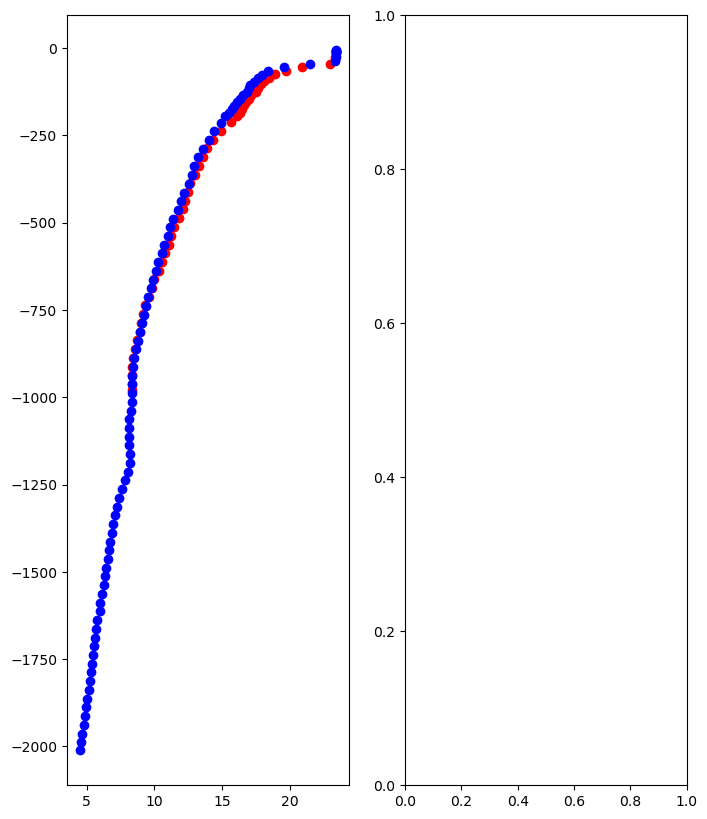

In [30]:
fig, ax = plt.subplots(1,2,figsize=(8,10))

#Temperature
ax[0].plot(data.TEMP[0],-data.PRES[0],'ro',label='N_PROF=0 D Fetcher')
ax[0].plot(data.TEMP[1],-data.PRES[1],'bo',label='N_PROF=1 A Fetcher')
ax[0].plot(cy1D.TEMP[0],-cy1D.PRES[0],'k-',label='N_PROF=0 D')
ax[0].set_title(cy1.TEMP.long_name)
ax[0].set_ylabel(cy1.PRES.long_name)
ax[0].grid()
ax[0].legend();

ax[1].plot(data.PSAL[0],-data.PRES[0],'ro',label='N_PROF=0 D Fetcher')
ax[1].plot(data.PSAL[1],-data.PRES[1],'bo',label='N_PROF=1 A Fetcher')
ax[1].plot(cy1D.PSAL[0],-cy1D.PRES[0],'k-',label='N_PROF=0 D')
ax[1].set_title(cy1.PSAL.long_name)
ax[1].set_ylabel(cy1.PRES.long_name)
ax[1].grid()
ax[1].legend();


In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(data.LONGITUDE[0],data.LATITUDE[0],'ko',label='001D N_PROF=0 Descending')
ax.plot(data.LONGITUDE[1],data.LATITUDE[1],'bo',label='001 N_PROF=0 Ascending')
#ax.set_title(cy1..long_name)
ax.text(data.LONGITUDE[0],cy1D.LATITUDE[0],'Date of observation for 001D:'+cy1D.JULD[0].values.astype(str), fontsize=14)
ax.text(data.LONGITUDE[1],cy1.LATITUDE[1],'Date of observation for 001:'+cy1.JULD[0].values.astype(str), fontsize=14)
ax.grid()
ax.legend();